# Connected Component Labelling #

v. alpha 0.1 

Two pass CCL algorithm (Rosenfeld and Pfaltz), second pass via Union/Find (disjoint sets) data structures, requires unionfind.py. 

At the present stage only 4 connectivity for the foreground is implemented. 



### Visualization Helpers ###

The following functions allow the visualization of a numerical matrix as a picture, and provide some samples. 

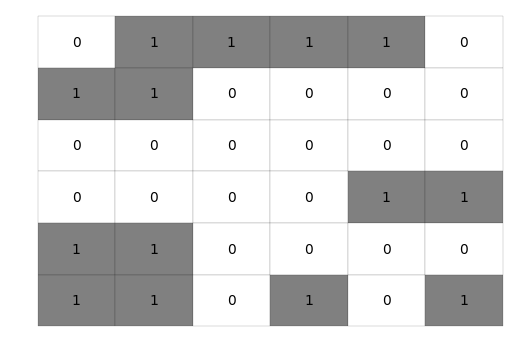

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import random 

from matplotlib.table import Table

def main():
    nx, ny = 6, 6
    data = np.random.randint(2,size=(ny,nx))
    checkerboard_table(data)
    plt.show()

def test_pattern(r=6, c=6, n=4):
    data = np.zeros((r,c))
    count = 0
    #indexes = list(np.ndindex(data.shape))
    indexes = list(np.ndindex((5,5)))
    print(random.choice(indexes))
    while count <= n:
        picked = random.choice(indexes)
        if (data[picked]==0 and data[(picked[0]+1, picked[1])]==0 and data[(picked[0], picked[1]+1)]==0 and data[(picked[0]+1, picked[1]+1)]==0):
            data[picked] = 1
            count +=1  
    color_table(data.astype(int))
    plt.show()
    return data
        
def saved_pattern(r=6, c=6, which = 1):
    data = np.zeros((r,c))
    #https://stackoverflow.com/questions/28491230/indexing-a-numpy-array-with-a-list-of-tuples
    samples = {1:[(0,0), (0,1), (1,0), (1,1), (2,3), (4,4), (4,5), (5,4), (5,5), (0,3), (0,4), (0,5), (1,5)], 
              2:[(0,0), (0,1), (3,2), (4,2), (5,2), (5,3), (3,4), (1,5)], 
              3:[(0,1), (0,2), (0,3), (0,4), (1,0), (1,1), (3,5), (3,4), (4,0), (5,0), (4,1), (5,1), (5,3), (5,5)]}
    data[tuple(np.array(samples[which]).T)] = 1
    color_table(data.astype(int))
    #plt.show()
    return data
    
    
def color_table(data, fmt='{:}', bkg_colors=['white', 'gray']):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax)#, bbox=[0,0,1,1])

    nrows, ncols = data.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = data[(i,j)]
        if idx > 1:
            idx = (idx % len(bkg_colors))
            if idx == 0: 
                idx = 3
            
        color = bkg_colors[idx]

        tb.add_cell(i, j, width, height, text=fmt.format(val), 
                    loc='center', facecolor=color)

    ax.add_table(tb)
    
    for key, cell in tb.get_celld().items():
        cell.set_linewidth(0.1)
    return fig

## For interactive visualization 
def color_tables(data, fig, ax, fmt='{:}', bkg_colors=['white', 'gray']):
    tb = Table(ax)#, bbox=[0,0,1,1])

    nrows, ncols = data.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = data[i,j]
        
        if idx > 1:
            idx = (idx % len(bkg_colors))
            if idx == 0: 
                idx = 3
            
        color = bkg_colors[idx]
        
        if idx == -1:
            val = 0
            color = '#DBDDDD'

        tb.add_cell(i, j, width, height, text=fmt.format(val), 
                    loc='center', facecolor=color)

    ax.add_table(tb)
    
    for key, cell in tb.get_celld().items():
        cell.set_linewidth(0.1)
    return fig

if __name__ == '__main__':
    #main()
    saved_pattern(which=3)

### Two pass algorithm ### 
**Import the unionfind data structure**, needed for the second pass. 

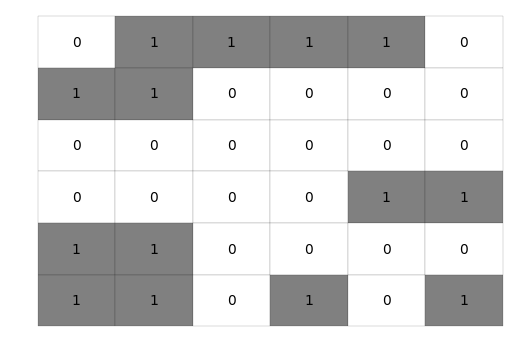

In [2]:
from unionfind import UnionFind
data = saved_pattern(which=3)
#data = test_pattern()

**Algorithm**

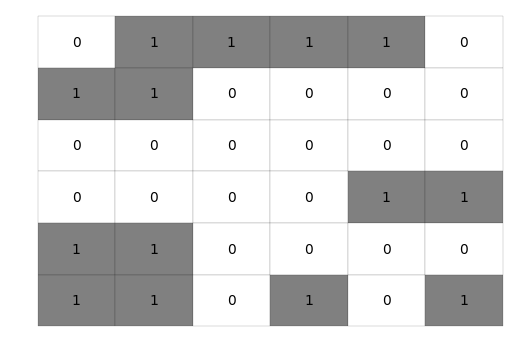

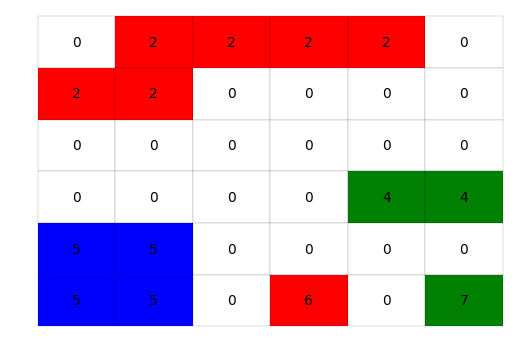

In [3]:
# Pad with zero for border control 
def padwithzeros(vector, pad_width, iaxis, kwargs):
     vector[:pad_width[0]] = 0
     vector[-pad_width[1]:] = 0
     return vector

data = saved_pattern(which=3)
data = np.pad(data, 1, padwithzeros)
label = 1
uf = UnionFind([label])

# First Pass 
for (i,j), x in np.ndenumerate(data[1:-1, 1:-1]):
    if data[i+1,j+1]==0:
        pass      
    elif data[i,j+1]==0 and data[i+1,j]==0:
        label+=1
        data[i+1,j+1]=label
    elif data[i,j+1]!=0 and data[i+1,j]!=0:
        data[i+1,j+1]=data[i,j+1]
        uf.union(data[i,j+1],data[i+1,j])
    elif data[i,j+1]!=0:
        data[i+1,j+1]=data[i,j+1]
    elif data[i+1,j]!=0:
        data[i+1,j+1]=data[i+1,j]

# Second Pass 
for (i,j), x in np.ndenumerate(data[1:-1, 1:-1]):
    if (data[i+1,j+1] in uf.component_mapping().keys()) and data[i+1,j+1] != min(uf.component(data[i+1,j+1])):
        #print(data[i+1,j+1] in uf.component_mapping().keys())
        data[i+1,j+1] = min(uf.component(data[i+1,j+1]))

# Visualize 
color_table(data[1:-1, 1:-1].astype(int), bkg_colors=['white', 'blue', 'red', 'green'])
plt.show()

## Step-wise algorithm ##

This is intended for presentation and pedagogical purposes. 
This version of the two pass algorithm can be runned by the user step by step.  

Requires jupyter widgets to be installed

For an interactive notebook ipywidgets need to be installed and properly configured. 
If the following code doesn't work or throw an error try to uninstall and reinstall ipywidget by running the following commands. 

- pip uninstall ipywidgets widgetsnbextension
- pip install ipywidgets
- jupyter nbextension enable --py --sys-prefix widgetsnbextension


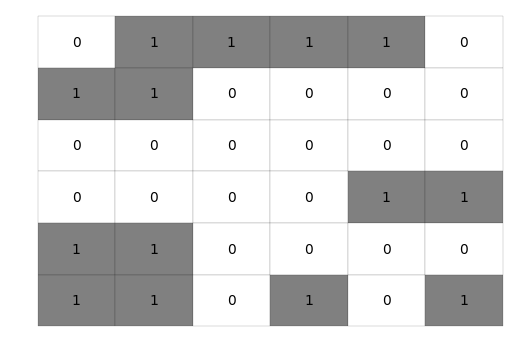

In [4]:
from ipywidgets import widgets
from ipywidgets import *
from IPython.display import display

# Pad with zero for border control 
def padwithzeros(vector, pad_width, iaxis, kwargs):
     vector[:pad_width[0]] = 0
     vector[-pad_width[1]:] = 0
     return vector

data = saved_pattern(which=3)
data = np.pad(data, 1, padwithzeros)
label = 1
uf = UnionFind([label])

steps = [x for x,k in np.ndenumerate(data[1:-1, 1:-1])]
# First Pass 
def first_pass(step, fig, ax):
    global label 
    i,j = steps[step]   
    if data[i+1,j+1]==0:
        data[i+1,j+1]=-1
        pass  
    elif data[i,j+1] in [0,-1] and data[i+1,j] in [0,-1]:
        label+=1
        data[i+1,j+1]=label
    elif data[i,j+1] not in [0,-1] and data[i+1,j] not in [0,-1]:
        data[i+1,j+1]=data[i,j+1]
        uf.union(data[i,j+1],data[i+1,j])
    elif data[i,j+1] not in [0,-1]:
        data[i+1,j+1]=data[i,j+1]
    elif data[i+1,j] not in [0,-1]:
        data[i+1,j+1]=data[i+1,j]
    return color_tables(data[1:-1, 1:-1].astype(int), fig, ax, bkg_colors=['white', 'blue', 'red', 'green'])

# Second Pass 
for (i,j), x in np.ndenumerate(data[1:-1, 1:-1]):
    if (data[i+1,j+1] in uf.component_mapping().keys()) and data[i+1,j+1] != min(uf.component(data[i+1,j+1])):
        #print(data[i+1,j+1] in uf.component_mapping().keys())
        data[i+1,j+1] = min(uf.component(data[i+1,j+1]))

# Visualize 
#color_table(data[1:-1, 1:-1].astype(int), bkg_colors=['white', 'blue', 'red', 'green'])

<IPython.core.display.Javascript object>


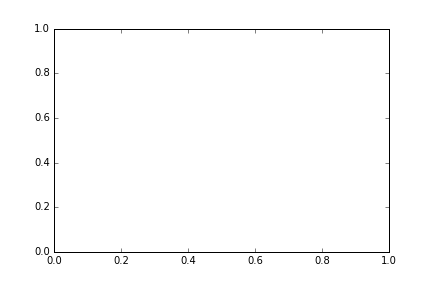

In [7]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

button = widgets.Button(description="Next Step")
display(button)
step = 0
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
def next_step(a):
    global step
    if step > 36:
        print('Nothing else to do')
        pass 
    else:
        global fig, ax
        #fig = plt.figure()
        #ax = fig.add_subplot(1, 1, 1)
        fig = first_pass(step, fig, ax)
        fig.canvas.draw()
        step += 1
button.on_click(next_step)